In [3]:
#!/usr/bin/env python

from __future__ import unicode_literals

import argparse
import collections
import io
import re

split_pattern = re.compile(r'([.,!?"\':;)(])')
digit_pattern = re.compile(r'\d')

'''
input)  My name is "ttakano        "  and I was born in 1994
output) ["my", "name", "is", """, "ttakano", """, "and", "i", "was", "born", "in", "0000"
'''
def split_sentence(s, use_lower):
    if use_lower:
        s = s.lower()
    s = s.replace('\u2019', "'")        #      ’→'
    s = digit_pattern.sub('0', s)        #[0-9] → "0"
    words = []
    for word in s.strip().split():
        words.extend(split_pattern.split(word))         # if word="(ttakano)"  words=["(", "ttakano", ")"]
    words = [w for w in words if w]
    return words




In [4]:
def count_lines(path):
    with io.open(path, encoding='utf-8', errors='ignore') as f:
        return sum([1 for _ in f])

In [5]:
def read_file(path, use_lower):
    n_lines = count_lines(path)
    with io.open(path, encoding='utf-8', errors='ignore') as f:
        for line in f:
            words = split_sentence(line, use_lower)
            yield words


In [6]:
def proc_dataset(
        path, outpath, vocab_path=None, vocab_size=None, use_lower=True):
    token_count = 0
    counts = collections.Counter()
    with io.open(outpath, 'w', encoding='utf-8') as f:
        for words in read_file(path, use_lower):
            line = ' '.join(words)
            f.write(line)
            f.write('\n')
            if vocab_path:
                for word in words:
                    counts[word] += 1
            token_count += len(words)
    print('number of tokens: %d' % token_count)

    if vocab_path and vocab_size:
        vocab = [word for (word, _) in counts.most_common(vocab_size)]
        with io.open(vocab_path, 'w', encoding='utf-8') as f:
            for word in vocab:
                f.write(word)
                f.write('\n')

    return counts


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

def show_graph(counts):
    list_word=counts.most_common(40000)
    counts = list(zip(*list_word))[1]
    plt.hist(
        counts,
        bins=100,
        range=(1, 100))

    plt.xlim(xmin=1, xmax=100)
    plt.ylim(ymin=1, ymax=5000)
    plt.grid(axis='y')
    plt.show()


In [8]:
INPUT="../dataset/ncKyotoAll.en"
OUTPUT="./dataset/pncKyotoAll.en"
vocab_file="./dataset/vocab.en"
couts = proc_dataset(
    INPUT, OUTPUT, vocab_path=vocab_file,
    vocab_size=40000, use_lower=True)

number of tokens: 11767864


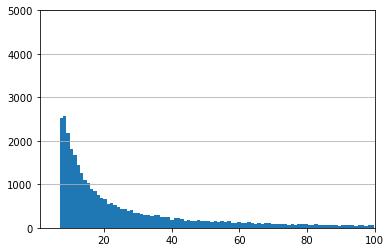

In [9]:
show_graph(couts)

In [15]:
i = 0;
for word, count in couts.most_common(100):
    print(i, end=" ")
    i+=1
    print("{0},{1}".format(word,count))

0 the,739268
1 ,,606256
2 of,430660
3 .,387446
4 and,288272
5 in,261908
6 (,256216
7 ),255774
8 to,213518
9 a,201339
10 was,172344
11 ',161437
12 is,103372
13 as,102543
14 ",95537
15 he,81737
16 0000,78747
17 that,71889
18 by,68942
19 it,66046
20 no,64995
21 on,64300
22 for,63877
23 his,58048
24 with,55667
25 from,52436
26 s,46137
27 at,43403
28 00,43068
29 were,42851
30 which,39486
31 who,36015
32 this,32886
33 an,32704
34 period,32176
35 are,31943
36 or,30359
37 :,29704
38 emperor,29117
39 family,28397
40 temple,28100
41 be,26769
42 after,26303
43 0,26091
44 also,25963
45 000,25376
46 kyoto,24698
47 but,24567
48 had,24489
49 imperial,24418
50 clan,23029
51 not,22956
52 there,21279
53 japan,20882
54 province,20735
55 japanese,20413
56 when,19903
57 city,19858
58 called,19856
59 one,19490
60 became,18713
61 name,17627
62 such,16926
63 station,16683
64 ;,16430
65 however,16324
66 they,16079
67 been,16017
68 prefecture,15691
69 used,15675
70 have,15176
71 during,14910
72 time,14048
73 -,